In [135]:
import yake
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import tqdm

In [148]:
language = "en"
max_ngram_size = 1
deduplication_threshold = 0.9
deduplication_algo = 'seqm'
windowSize = 3
numOfKeywords = 5

kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)

In [149]:
df = pd.read_csv('/Users/carina/Downloads/courses/final thesis/dataset/annotated text.csv')
heads = df.columns.values.tolist()

In [150]:
df_keywords = pd.DataFrame()
for head in heads:
    
    keyword = []
    
    texts = []
    texts = df[head].tolist()
    
    for text in texts:
        keywords_values = kw_extractor.extract_keywords(text)
        keywords = []
        for kw in keywords_values:
            keywords.append(kw[0])
            
        keyword.append(keywords)
    
    df_keywords[head] = keyword
    
df_keywords.to_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/keywords_YAKE_5.csv')

In [108]:
def jaccard_sim(a, b):
    unions = len(set(a).union(set(b)))
    intersections = len(set(a).intersection(set(b)))
    return intersections / unions

In [109]:
original_keywords = df_keywords['paragraph'].tolist()
df_keyword = df_keywords.drop(df_keywords.columns[0],axis=1) #remove original paras
heads = df_keyword.columns.values.tolist()
df_jacc_sim = pd.DataFrame()
for head in heads:
    jacc_sims = []
    tem_list = df_keyword[head].tolist()
    for i,j in zip(original_keywords,tem_list):
        jacc_sim = jaccard_sim(i, j)
        jacc_sims.append(jacc_sim)
    df_jacc_sim[head] = jacc_sims

In [110]:
df_jaccsim_plot = pd.DataFrame()
heads = df_jacc_sim.columns.values.tolist()
source = ['NLP paper','Literature','News','Encyclopedias','Social Media','Speeches','Interview','Instruction Manuals']

data_source = []
jaccsim = []
WATs = []
for head in heads:
    
    WAT = [head]*60
    tem_jaccsim = df_jacc_sim[head].tolist()
    
    i = 0
    
    for i in range(8):
        datasource = [source[i]] * 60
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            jaccsim.append(tem_jaccsim[tem_index])

        data_source = data_source + datasource
        WATs = WATs + WAT

        
df_jaccsim_plot['jacc_sim'] = jaccsim
df_jaccsim_plot['datasource'] = data_source
df_jaccsim_plot['WATs'] = WATs

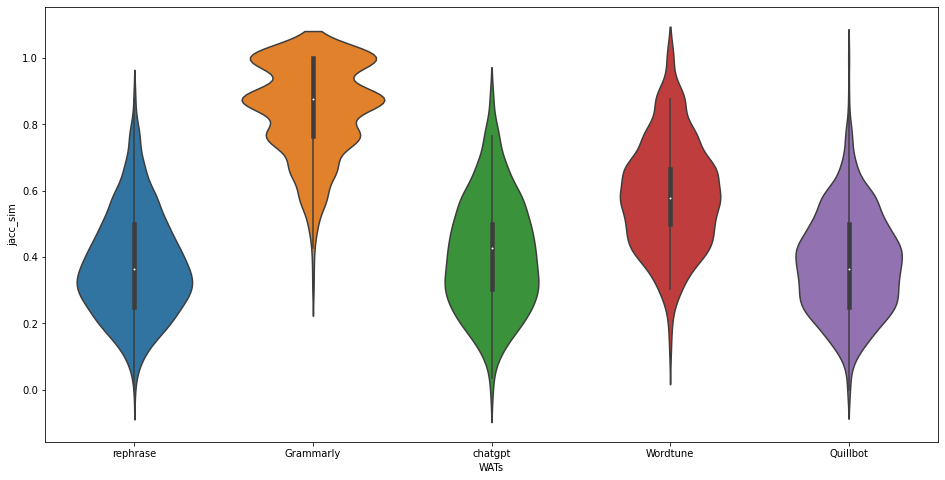

In [111]:
f= plt.subplots(1,figsize=(16,8))
c = sns.violinplot(y="jacc_sim",x= "WATs", data=df_jaccsim_plot)

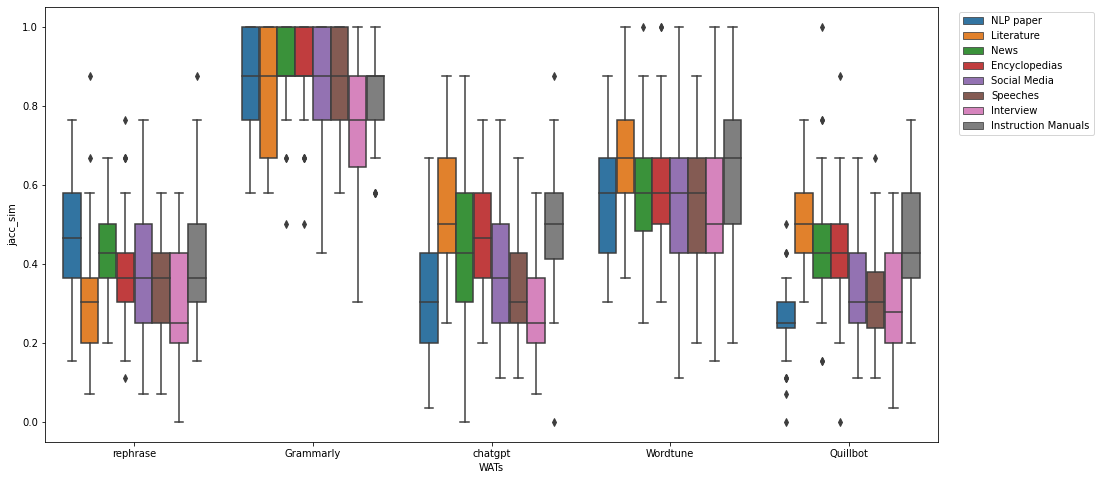

In [112]:
f = plt.subplots(1,figsize=(16,8))
a = sns.boxplot(y="jacc_sim",x= "WATs",hue="datasource", data=df_jaccsim_plot)
a.legend (bbox_to_anchor = (1.18, 1))

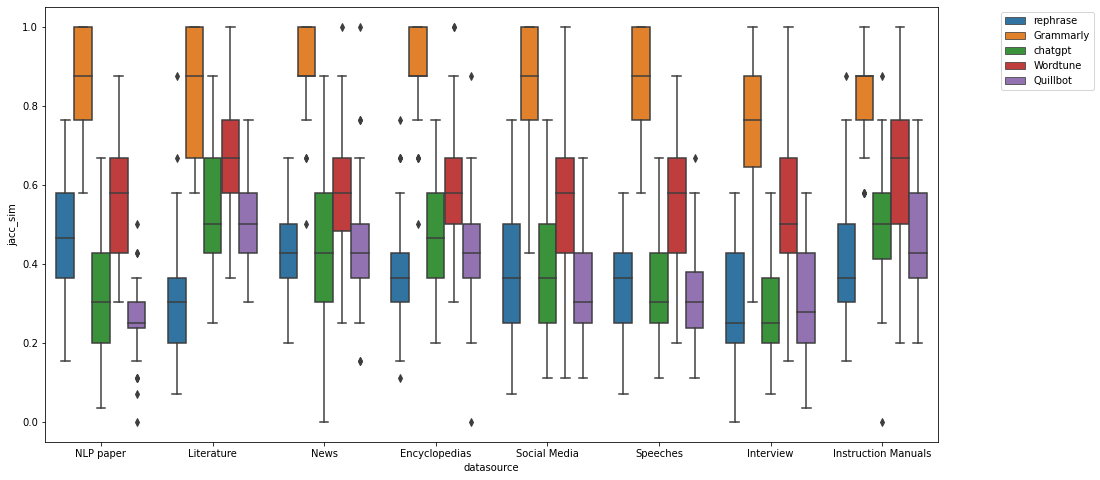

In [113]:
f = plt.subplots(1,figsize=(16,8))
a = sns.boxplot(y="jacc_sim",x= "datasource",hue="WATs", data=df_jaccsim_plot)
a.legend (bbox_to_anchor = (1.18, 1))

In [ ]:
import codecs
from textrank4zh import TextRank4Keyword, TextRank4Sentence
text = codecs.open('./text/01.txt', 'r', 'utf-8').read()
tr4w = TextRank4Keyword(stop_words_file='./stopword.data')  # 导入停止词
# 使用词性过滤，文本小写，窗口为2
tr4w.train(text=text, speech_tag_filter=True, lower=True, window=2)  
print('关键词：')
# 20个关键词且每个的长度最小为1
print('/'.join(tr4w.get_keywords(20, word_min_len=1)) ) 
print('关键短语：')
# 20个关键词去构造短语，短语在原文本中出现次数最少为2
print('/'.join(tr4w.get_keyphrases(keywords_num=20, min_occur_num= 2)))  
tr4s = TextRank4Sentence(stop_words_file='./stopword.data')
# 使用词性过滤，文本小写，使用words_all_filters生成句子之间的相似性
tr4s.train(text=text, speech_tag_filter=True, lower=True, source = 'all_filters')
print('摘要：')
print('\n'.join(tr4s.get_key_sentences(num=3))) # 重要性最高的三个句子
